# Least Squares Boosting

revision: 78571a2

In [8]:
# @formatter:off
# PREAMBLE

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor

from mlis.arrays import asinput, aslabel

%matplotlib inline
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")
%load_ext autoreload
%autoreload 2
# @formatter:on

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


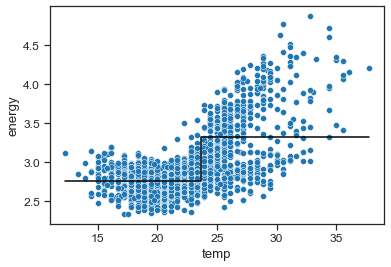

In [9]:
# we will not implement a decision tree regressor again, but use the one from sklearn
# fits a decision tree stump
def stump_fit(X, y):
    # sklearn expects X to be a matrix, so we reshape it to a mx1 matrix.
    h = DecisionTreeRegressor(max_depth=1)
    h.fit(asinput(X), aslabel(y))
    # sklearn expects X to be a matrix, so we reshape it to a mx1 matrix.
    predict = lambda Z: h.predict(asinput(Z))
    return predict


# load data
df = pd.read_csv('energy.csv', sep=' ')
X = asinput(df['temp'])
y = aslabel(df['energy'])
t = np.linspace(X.min(), X.max())

# fit a decision tree stump
stump = stump_fit(X, y)

# plot data
fig, ax = plt.subplots()
sns.scatterplot(ax=ax, x='temp', y='energy', data=df)

# plot individual trees
ax.plot(t, stump(t), 'k', drawstyle='steps-pre');

Implement the least squares boosting algoithm using decision tree stumps. Create an ensemble $H$ with

$$
H(x) = h_1(x) + h_2(x) + \dots + h_T(x)
$$

where each stump $h_t$ is fitted to the residuals of $H_{t-1}$.
Make sure, that you get for $T=1$ the same result as above.

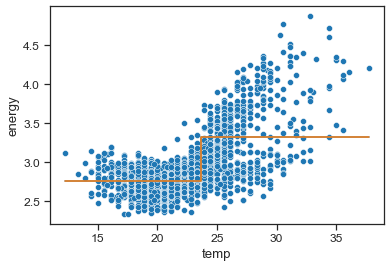

In [11]:
# Open ls_boosting.py and implement the function ls_boosting_fit

from mlis.ensembles.ls_boosting import ls_boosting_fit

# plot data
fig, ax = plt.subplots()
sns.scatterplot(ax=ax, x='temp', y='energy', data=df)

# plot predictions
for T in [1, 3, 50]:
    H = ls_boosting_fit(X, y, T)
    ax.plot(t, H(t), drawstyle='steps-pre')